This task will involve the analysis of data from Titanic passengers.

At first look, through reading the .csv file in excel, we see a few interesting columns that merit further investigation.

We will address the following questions through an analysis of the data:

Is there a correlation between the fares passengers paid and whether or not they survived?
Were passengers in higher classes more likely to survive than passengers in lower classes?
Were female passengers more likely to survive than male passengers?

To begin, we will load the .csv file into python:

In [1]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read in csv data using only relevant columns, as indicated by usecols()
df = pd.read_csv('titanicdata.csv', header=0, names=['PassengerID', 'Survived', 'Class',
                                                     'Sex', 'Fare'], usecols=(0,1,2,4,9))

As can be seen above, we will only use certain columns, as some columns contain too many missing values and others contain information not relevant to our investigation.

In [2]:
#Check data types
print "Raw data types:"
print df.dtypes

Raw data types:
PassengerID      int64
Survived         int64
Class            int64
Sex             object
Fare           float64
dtype: object


Most columns are of an appropriate data type.  However, we will want to change the "PassengerID" column from an int to an object, since no arithmetic would be performed on it.  Also, we will want to change the "Survived" column from an int to a bool.

In [3]:
#Fix data types
def fix_data_types(col, newtype):
    df[[col]] = df[[col]].astype(newtype)

fix_data_types('PassengerID', object) #Change the PassengerID column to an object type
fix_data_types('Survived', bool) #Change the Survived column to a bool type

In [4]:
print "New data types:"
print df.dtypes

New data types:
PassengerID     object
Survived          bool
Class            int64
Sex             object
Fare           float64
dtype: object


Above, we can confirm the data types have been successfully changed.

In [5]:
print df.isnull().sum() #Check for missing values

PassengerID    0
Survived       0
Class          0
Sex            0
Fare           0
dtype: int64


We can confirm that our dataset with its selected columns contains no missing values.

Now we will begin our analysis by viewing descriptive statistics on the entire population of fares.

In [6]:
print "Overall fare statistics:"

print df['Fare'].describe() #Use the describe() method to view descriptive statistics

Overall fare statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


There is clearly a wide range of fares paid by passengers, and these initial figures suggest that outliers exist towards the higher end of the range.

We will now use the pandas groupby() function to analyze fare data from survivors and non-survivors individually.

In [7]:
survivors = df.groupby(['Survived']) #Using the Survived column

In [8]:
print "Mean fare based on survival status"
print survivors['Fare'].mean() #Take the mean of the Fare column

Mean fare based on survival status
Survived
False    22.117887
True     48.395408
Name: Fare, dtype: float64


We see that those passengers who survived had a higher mean fare than those who did not.

Since the mean can be influenced by extreme values, as seen in the boxplot distribution above of all fares, we must also look at the median fare for both groups.

In [9]:
print "Median fare based on survival status"
print survivors['Fare'].median() #Take the median of the Fare column

Median fare based on survival status
Survived
False    10.5
True     26.0
Name: Fare, dtype: float64


Passengers who survived also had a higher median fare.

In [10]:
print survivors.size() #Take the total number of values for survivors and for non survivors

Survived
False    549
True     342
dtype: int64


More passengers in our dataset perished than survived.

Now we will look at the distribution of fares between survivors and non-survivors simultaneously.

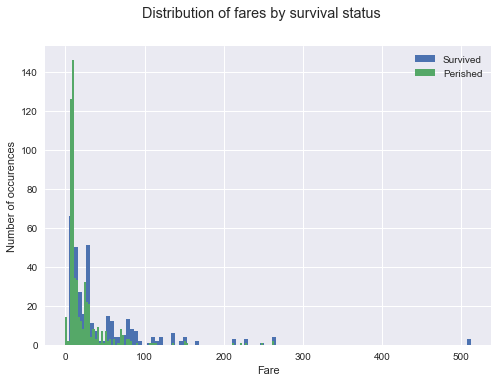

In [11]:
pas_survived = df.query('Survived==1')['Fare'] #Use the query() method to get the fare column for survivors
pas_perished = df.query('Survived==0')['Fare'] #Use the query() method to get the fare column for non survivors

fig2 = plt.figure()
plt.hist(pas_survived, bins=100) #Set the number of bins to 100 for the histogram
plt.hist(pas_perished, bins=100)
fig2.suptitle('Distribution of fares by survival status') #Set the title of the chart
plt.xlabel('Fare') #Label the x axis as Fare
plt.ylabel('Number of occurences') #Label the y axis as Number of occurences
plt.legend(("Survived", "Perished")) #Create a legend to distinguish each distribution
plt.show()

The main observation of this histogram is that the distribution of fares for non-survivors is substantially more positively skewed than that of the survivors, indicating that passengers who perished tended to have lower fares.

We will now look at the boxplot distributions for both groups and compare.

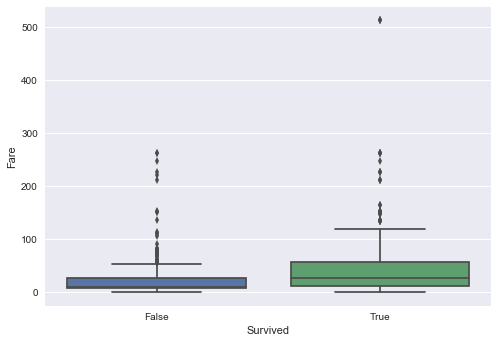

In [12]:
sns.boxplot(data=df, y='Fare', x='Survived') #Create a boxplot showing the fare distribution by survival status
sns.plt.show()

From this boxplot, it is clear that most of the fares for non-survivors tended to be concentrated in the lower values, while those of the survivors were spread more into higher values.  Both groups are seen to have outliers.

We will now proceed to analyze the relationship between passenger class and survival.

In [13]:
cabin = df.groupby(['Class']) #Using the class column

First, we will examine fare statistics for each class.

In [14]:
print "Mean fare based on class"
print cabin['Fare'].mean() #Compute the mean fare for each class

Mean fare based on class
Class
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


It is clear that first class fares were considerably higher than second and third class fares.

In [15]:
print "Median fare based on class"
print cabin['Fare'].median() #Compute the median fare for each class

Median fare based on class
Class
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64


We see that the median fares were also progressively higher for each class.

In [16]:
print cabin.size() #Display the number of passengers in each cabin

Class
1    216
2    184
3    491
dtype: int64


By far, the third class cabin was the largest.

Now we will examine how many passengers in each class survived.

In [17]:
print df.groupby(['Class'])['Survived'].mean()

Class
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


From our above calculations, it is clear that first class passengers had the highest rate of survival, while third class passengers had the lowest.

We will now examine the relationship between gender and survival.

In [18]:
print df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Here, we see that a much higher percentage of female passengers (approx. 74%) survived than male passengers (approx. 19%), indicating a possibility that they were given priority for lifeboats.

In conclusion, it is clear that survivors tended to be those who paid higher fares.  Survivors had a higher mean fare as well as a higher median fare.  Furthermore, the visual charts we examined support the finding that survivors tended to have higher fares.  Also, passengers in higher class cabins tended to have a higher rate of survival than passengers in lower class cabins.  Finally, we have seen that a far greater percentage of female passengers survived than did male passengers.  However, it must be made clear that this analysis does not imply a causal relationship between the variables discussed above.  Also, it is not entirely guaranteed that the dataset used includes every passenger.

From this analysis, there are many other factors of the Titanic disaster that could be investigated.  If higher fare-paying passengers were more likely to survive, one would want to explore various contributing factors.  For example, did higher fare-paying passengers have the money to bribe staff into allowing them onto lifeboats?  Also, did the placement of First, Second, and Third class cabins affect passengers' ability to reach lifeboats?  These are just a few questions that could be explored in light of this analysis.